Participant P01, Session 1, HRV SDNN: 80.14
Participant P01, Session 1, Pupil Dilation STD: 1.25
Participant P01, Session 1, Duration STD: 3.55 seconds
Participant P01, Session 2, HRV SDNN: 65.39
Participant P01, Session 2, Pupil Dilation STD: 0.61
Participant P01, Session 2, Duration STD: 5.38 seconds
Participant P01, Session 3, HRV SDNN: 1012.69
Participant P01, Session 3, Pupil Dilation STD: 0.80
Participant P01, Session 3, Duration STD: 6.95 seconds
Participant P02, Session 1, HRV SDNN: 46.20
Participant P02, Session 1, Pupil Dilation STD: 0.49
Participant P02, Session 1, Duration STD: 2.99 seconds
Participant P02, Session 2, HRV SDNN: 47.81
Participant P02, Session 2, Pupil Dilation STD: 1.12
Participant P02, Session 2, Duration STD: 2.18 seconds
Participant P02, Session 3, HRV SDNN: 47.40
Participant P02, Session 3, Pupil Dilation STD: 0.48
Participant P02, Session 3, Duration STD: 2.30 seconds
Participant P03, Session 1, HRV SDNN: 54.98
Participant P03, Session 1, Pupil Dilation

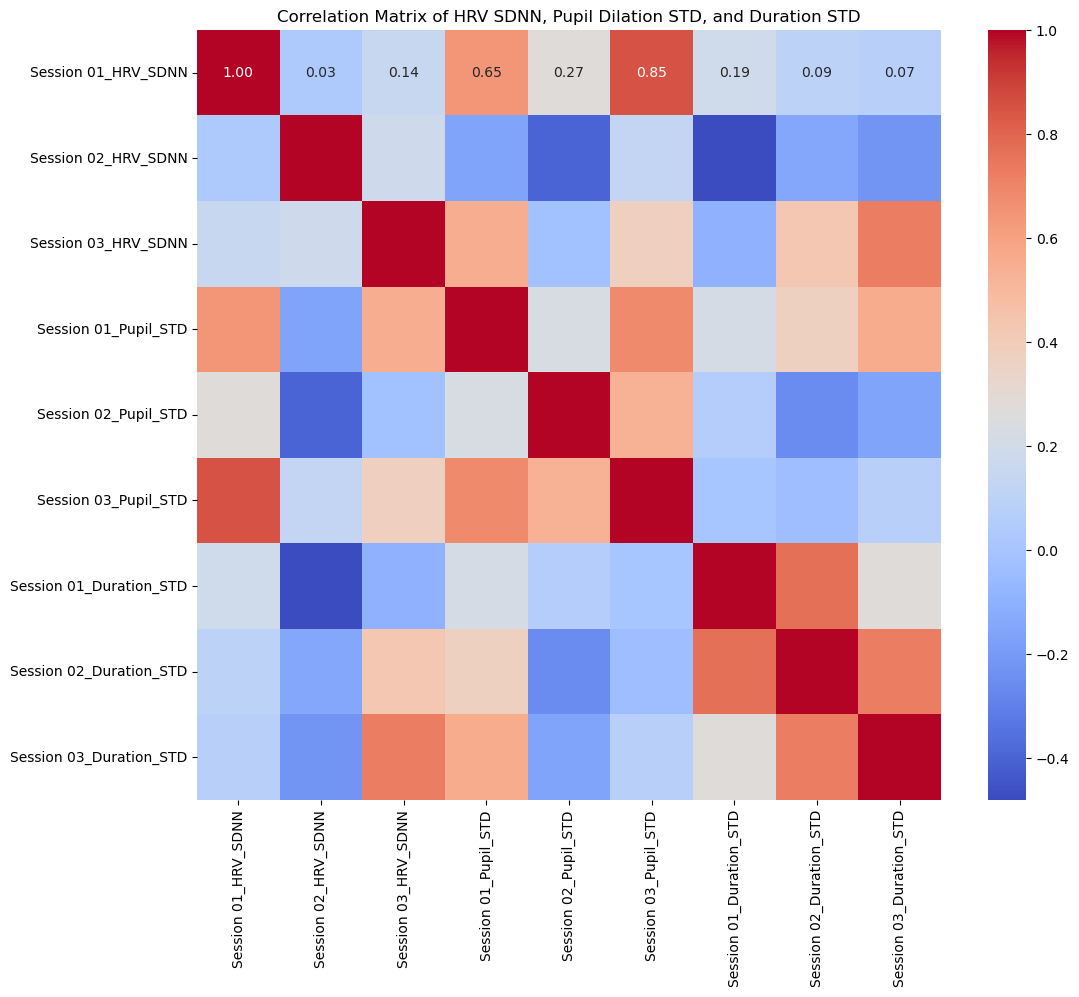

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define column mapping for pupil data
columns_mapping = {
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}

# Function to calculate HRV SDNN
def calculate_hrv_std(ibi_data):
    valid_ibi = pd.Series(ibi_data)
    sdnn = np.std(valid_ibi, ddof=1)
    return sdnn

# Function to calculate pupil dilation standard deviation
def calculate_pupil_dilation_std(pupil_data):
    valid_pupil_dilation = pd.Series(pupil_data)
    std_pupil_dilation = np.std(valid_pupil_dilation, ddof=1)
    return std_pupil_dilation

# Function to calculate duration standard deviation
def calculate_duration_std(psychometric_data):
    psychometric_data['Question Start Time'] = pd.to_datetime(psychometric_data['Question Start Time']).dt.tz_localize(None)
    psychometric_data['Question Answer Time'] = pd.to_datetime(psychometric_data['Question Answer Time']).dt.tz_localize(None)
    psychometric_data['answer_duration'] = (psychometric_data['Question Answer Time'] - psychometric_data['Question Start Time']).dt.total_seconds()
    std_duration = psychometric_data['answer_duration'].std()
    return std_duration

# Load datasets for all participants
participants_hrv_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_03.csv')]
}

participants_pupil_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_03.csv')]
}

participants_duration_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_03.csv')]
}

# Initialize lists to collect the results
hrv_results = []
pupil_results = []
duration_results = []

# Process data for each participant
for participant_id, data in participants_hrv_data.items():
    participant_hrv_results = {'Participant': participant_id}
    participant_pupil_results = {'Participant': participant_id}
    participant_duration_results = {'Participant': participant_id}
    
    for session_number, (hrv_df, pupil_df, duration_df) in enumerate(zip(data, participants_pupil_data[participant_id], participants_duration_data[participant_id]), start=1):
        # Calculate HRV SDNN
        hrv_sdnn = calculate_hrv_std(hrv_df['ibi'])
        participant_hrv_results[f'Session {session_number:02d}'] = hrv_sdnn
        
        # Calculate pupil dilation STD
        pupil_df.rename(columns=columns_mapping, inplace=True)
        pupil_std = calculate_pupil_dilation_std(pupil_df['pupil_dilation'])
        participant_pupil_results[f'Session {session_number:02d}'] = pupil_std
        
        # Calculate duration STD
        duration_std = calculate_duration_std(duration_df)
        participant_duration_results[f'Session {session_number:02d}'] = duration_std
        
        # Debug prints for verification
        print(f"Participant {participant_id}, Session {session_number}, HRV SDNN: {hrv_sdnn:.2f}")
        print(f"Participant {participant_id}, Session {session_number}, Pupil Dilation STD: {pupil_std:.2f}")
        print(f"Participant {participant_id}, Session {session_number}, Duration STD: {duration_std:.2f} seconds")
    
    hrv_results.append(participant_hrv_results)
    pupil_results.append(participant_pupil_results)
    duration_results.append(participant_duration_results)

# Convert results to DataFrames
hrv_results_df = pd.DataFrame(hrv_results)
pupil_results_df = pd.DataFrame(pupil_results)
duration_results_df = pd.DataFrame(duration_results)

# Combine the results into a single DataFrame for correlation analysis
combined_results = hrv_results_df.set_index('Participant').add_suffix('_HRV_SDNN').join(
                    pupil_results_df.set_index('Participant').add_suffix('_Pupil_STD')).join(
                    duration_results_df.set_index('Participant').add_suffix('_Duration_STD'))

# Calculate the correlation matrix
correlation_matrix = combined_results.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of HRV SDNN, Pupil Dilation STD, and Duration STD')
plt.show()

Participant P01, Session 1, HRV SDNN: 80.14
Participant P01, Session 1, Pupil Dilation STD: 1.25
Participant P01, Session 1, Duration STD: 3.55 seconds
Participant P01, Session 2, HRV SDNN: 65.39
Participant P01, Session 2, Pupil Dilation STD: 0.61
Participant P01, Session 2, Duration STD: 5.38 seconds
Participant P01, Session 3, HRV SDNN: 1012.69
Participant P01, Session 3, Pupil Dilation STD: 0.80
Participant P01, Session 3, Duration STD: 6.95 seconds
Participant P02, Session 1, HRV SDNN: 46.20
Participant P02, Session 1, Pupil Dilation STD: 0.49
Participant P02, Session 1, Duration STD: 2.99 seconds
Participant P02, Session 2, HRV SDNN: 47.81
Participant P02, Session 2, Pupil Dilation STD: 1.12
Participant P02, Session 2, Duration STD: 2.18 seconds
Participant P02, Session 3, HRV SDNN: 47.40
Participant P02, Session 3, Pupil Dilation STD: 0.48
Participant P02, Session 3, Duration STD: 2.30 seconds
Participant P03, Session 1, HRV SDNN: 54.98
Participant P03, Session 1, Pupil Dilation

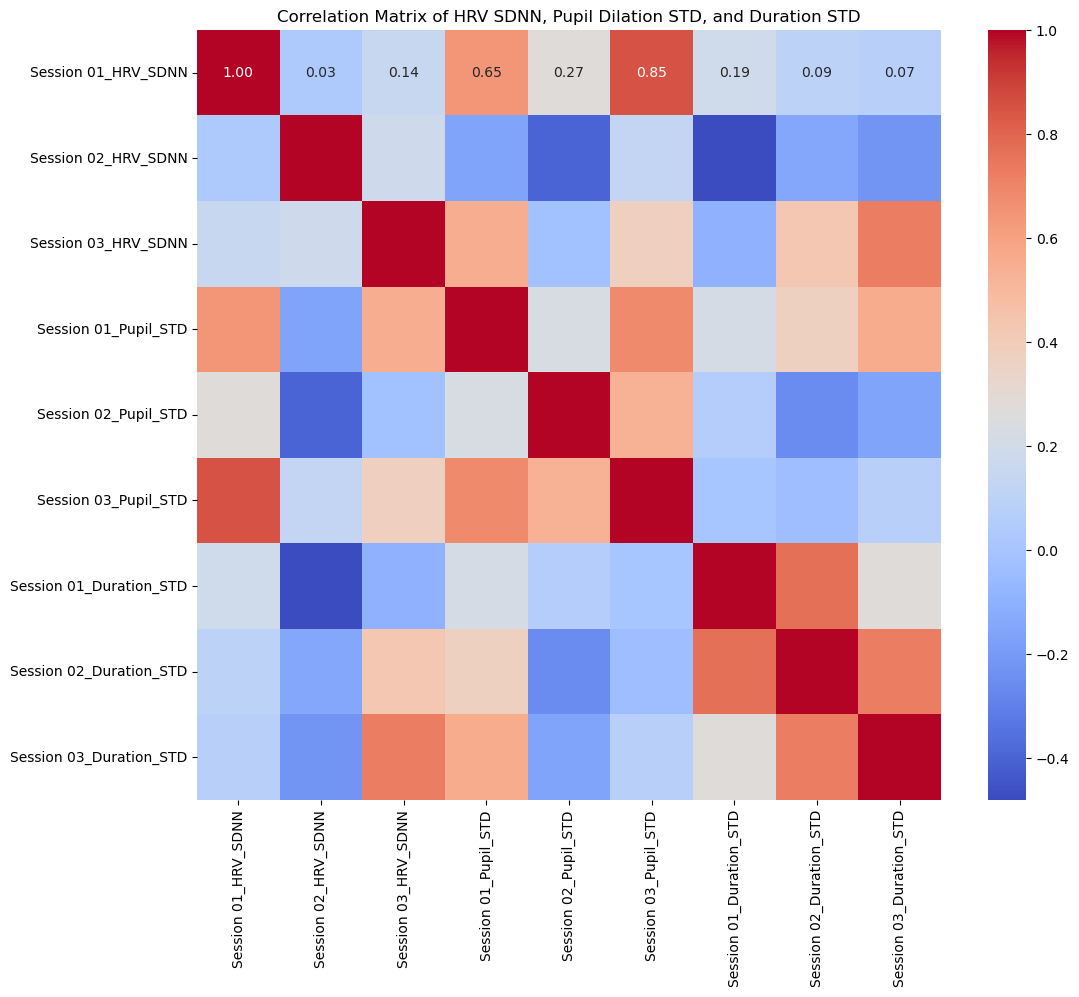

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define column mapping for pupil data
columns_mapping = {
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}

# Function to calculate HRV SDNN
def calculate_hrv_std(ibi_data):
    valid_ibi = pd.Series(ibi_data)
    sdnn = np.std(valid_ibi, ddof=1)
    return sdnn

# Function to calculate pupil dilation standard deviation
def calculate_pupil_dilation_std(pupil_data):
    valid_pupil_dilation = pd.Series(pupil_data)
    std_pupil_dilation = np.std(valid_pupil_dilation, ddof=1)
    return std_pupil_dilation

# Function to calculate duration standard deviation
def calculate_duration_std(psychometric_data):
    psychometric_data['Question Start Time'] = pd.to_datetime(psychometric_data['Question Start Time']).dt.tz_localize(None)
    psychometric_data['Question Answer Time'] = pd.to_datetime(psychometric_data['Question Answer Time']).dt.tz_localize(None)
    psychometric_data['answer_duration'] = (psychometric_data['Question Answer Time'] - psychometric_data['Question Start Time']).dt.total_seconds()
    std_duration = psychometric_data['answer_duration'].std()
    return std_duration

# Load datasets for all participants
participants_hrv_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_03.csv')]
}

participants_pupil_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_03.csv')]
}

participants_duration_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/Psychometric_Test_Results_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/Psychometric_Test_Results_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/Psychometric_Test_Results_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/Psychometric_Test_Results_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/Psychometric_Test_Results_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/Psychometric_Test_Results_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/Psychometric_Test_Results_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/Psychometric_Test_Results_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/Psychometric_Test_Results_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/Psychometric_Test_Results_03.csv')]
}

# Initialize lists to collect the results
hrv_results = []
pupil_results = []
duration_results = []

# Process data for each participant
for participant_id, data in participants_hrv_data.items():
    participant_hrv_results = {'Participant': participant_id}
    participant_pupil_results = {'Participant': participant_id}
    participant_duration_results = {'Participant': participant_id}
    
    for session_number, (hrv_df, pupil_df, duration_df) in enumerate(zip(data, participants_pupil_data[participant_id], participants_duration_data[participant_id]), start=1):
        # Calculate HRV SDNN
        hrv_sdnn = calculate_hrv_std(hrv_df['ibi'])
        participant_hrv_results[f'Session {session_number:02d}'] = hrv_sdnn
        
        # Calculate pupil dilation STD
        pupil_df.rename(columns=columns_mapping, inplace=True)
        pupil_std = calculate_pupil_dilation_std(pupil_df['pupil_dilation'])
        participant_pupil_results[f'Session {session_number:02d}'] = pupil_std
        
        # Calculate duration STD
        duration_std = calculate_duration_std(duration_df)
        participant_duration_results[f'Session {session_number:02d}'] = duration_std
        
        # Debug prints for verification
        print(f"Participant {participant_id}, Session {session_number}, HRV SDNN: {hrv_sdnn:.2f}")
        print(f"Participant {participant_id}, Session {session_number}, Pupil Dilation STD: {pupil_std:.2f}")
        print(f"Participant {participant_id}, Session {session_number}, Duration STD: {duration_std:.2f} seconds")
    
    hrv_results.append(participant_hrv_results)
    pupil_results.append(participant_pupil_results)
    duration_results.append(participant_duration_results)

# Convert results to DataFrames
hrv_results_df = pd.DataFrame(hrv_results)
pupil_results_df = pd.DataFrame(pupil_results)
duration_results_df = pd.DataFrame(duration_results)

# Combine the results into a single DataFrame for correlation analysis
combined_results = hrv_results_df.set_index('Participant').add_suffix('_HRV_SDNN').join(
                    pupil_results_df.set_index('Participant').add_suffix('_Pupil_STD')).join(
                    duration_results_df.set_index('Participant').add_suffix('_Duration_STD'))

# Calculate the correlation matrix
correlation_matrix = combined_results.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of HRV SDNN, Pupil Dilation STD, and Duration STD')
plt.show()

Participant P01, Session 1, HRV SDNN: 80.14
Participant P01, Session 1, Pupil Dilation STD: 1.25
Participant P01, Session 1, HRV SDNN: 80.14
Participant P01, Session 1, Pupil Dilation STD: 1.25
Participant P01, Session 2, HRV SDNN: 65.39
Participant P01, Session 2, Pupil Dilation STD: 0.61
Participant P01, Session 2, HRV SDNN: 65.39
Participant P01, Session 2, Pupil Dilation STD: 0.61
Participant P01, Session 3, HRV SDNN: 1012.69
Participant P01, Session 3, Pupil Dilation STD: 0.80
Participant P01, Session 3, HRV SDNN: 1012.69
Participant P01, Session 3, Pupil Dilation STD: 0.80
Participant P02, Session 1, HRV SDNN: 46.20
Participant P02, Session 1, Pupil Dilation STD: 0.49
Participant P02, Session 1, HRV SDNN: 46.20
Participant P02, Session 1, Pupil Dilation STD: 0.49
Participant P02, Session 2, HRV SDNN: 47.81
Participant P02, Session 2, Pupil Dilation STD: 1.12
Participant P02, Session 2, HRV SDNN: 47.81
Participant P02, Session 2, Pupil Dilation STD: 1.12
Participant P02, Session 3

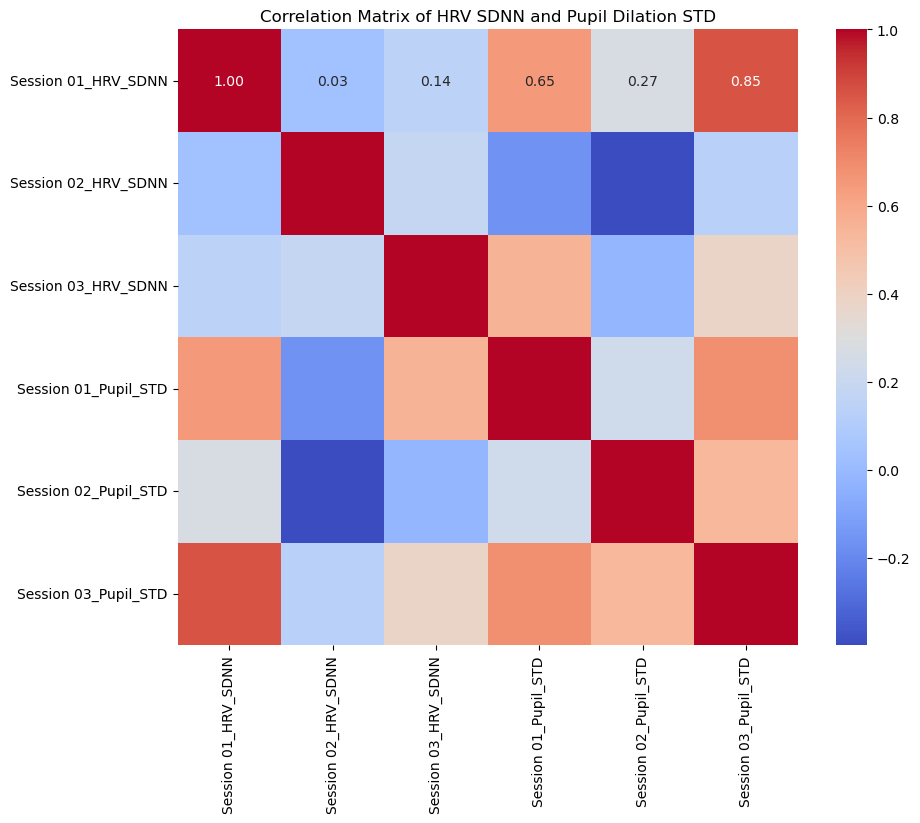

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define column mapping for pupil data
columns_mapping = {
    'datetime': 'timestamp',
    'pupil': 'pupil_dilation',
    'leftEyeOpen': 'left_blink',
    'rightEyeOpen': 'right_blink'
}

# Function to calculate HRV SDNN
def calculate_hrv_std(ibi_data):
    valid_ibi = pd.Series(ibi_data)
    sdnn = np.std(valid_ibi, ddof=1)
    return sdnn

# Function to calculate pupil dilation standard deviation
def calculate_pupil_dilation_std(pupil_data):
    valid_pupil_dilation = pd.Series(pupil_data)
    std_pupil_dilation = np.std(valid_pupil_dilation, ddof=1)
    return std_pupil_dilation

# Load datasets for all participants
participants_hrv_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/ibi_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/ibi_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/ibi_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/ibi_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/ibi_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/ibi_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/ibi_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/ibi_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/ibi_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/ibi_03.csv')]
}

participants_pupil_data = {
    'P01': [pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P01/Nuro/sed_03.csv')],
    'P02': [pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P02/Nuro/sed_03.csv')],
    'P03': [pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P03/Nuro/sed_03.csv')],
    'P04': [pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P04/Nuro/sed_03.csv')],
    'P05': [pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P05/Nuro/sed_03.csv')],
    'P06': [pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P06/Nuro/sed_03.csv')],
    'P07': [pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P07/Nuro/sed_03.csv')],
    'P08': [pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P08/Nuro/sed_03.csv')],
    'P09': [pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P09/Nuro/sed_03.csv')],
    'P10': [pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_01.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_02.csv'),
            pd.read_csv('/Users/urmebose/Desktop/Style/P10/Nuro/sed_03.csv')]
}

# Initialize lists to collect the results
hrv_results = []
pupil_results = []

# Process data for each participant
for participant_id, data in participants_hrv_data.items():
    participant_hrv_results = {'Participant': participant_id}
    participant_pupil_results = {'Participant': participant_id}
    
    for session_number, (hrv_df, pupil_df) in enumerate(zip(data, participants_pupil_data[participant_id]), start=1):
        # Calculate HRV SDNN
        hrv_sdnn = calculate_hrv_std(hrv_df['ibi'])
        participant_hrv_results[f'Session {session_number:02d}'] = hrv_sdnn
        
        # Calculate pupil dilation STD
        pupil_df.rename(columns=columns_mapping, inplace=True)
        pupil_std = calculate_pupil_dilation_std(pupil_df['pupil_dilation'])
        participant_pupil_results[f'Session {session_number:02d}'] = pupil_std
        
        # Debug prints for verification
        print(f"Participant {participant_id}, Session {session_number}, HRV SDNN: {hrv_sdnn:.2f}")
        print(f"Participant {participant_id}, Session {session_number}, Pupil Dilation STD: {pupil_std:.2f}")
    
        # Debug prints for verification
        print(f"Participant {participant_id}, Session {session_number}, HRV SDNN: {hrv_sdnn:.2f}")
        print(f"Participant {participant_id}, Session {session_number}, Pupil Dilation STD: {pupil_std:.2f}")
    
    hrv_results.append(participant_hrv_results)
    pupil_results.append(participant_pupil_results)

# Convert results to DataFrames
hrv_results_df = pd.DataFrame(hrv_results)
pupil_results_df = pd.DataFrame(pupil_results)

# Combine the results into a single DataFrame for correlation analysis
combined_results = hrv_results_df.set_index('Participant').add_suffix('_HRV_SDNN').join(
                    pupil_results_df.set_index('Participant').add_suffix('_Pupil_STD'))

# Calculate the correlation matrix
correlation_matrix = combined_results.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of HRV SDNN and Pupil Dilation STD')
plt.show()